In [1]:
from cProfile import label
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [2]:


# This program is used to calculate ndvi index for every image obtained after it was cropped.

# function to increase the contrast
def contrast(img):
    in_min = np.percentile(img, 5)
    in_max = np.percentile(img, 95)

    out_min = 0.0
    out_max = 255.0

    out = img - in_min
    out *= ((out_min - out_max) / (in_min - in_max))
    out += in_min
    return out


# function to culculate the ndvi index
def calc_ndvi(img):
    # create the variabels for the 3 colors channels: red. green and blue
    b, g, r = cv2.split(img)

    # create bottom as the sum of the red and blue channel
    bottom = (r.astype(float) + b.astype(float))

    # initialize bottom
    # to avoid dividing by 0 wich won't give a risult
    bottom[bottom == 0] = 0.01

    # calculate the ndvi index
    ndvi = (b.astype(float) - r) / bottom
    return ndvi


# load the original img
original = cv2.imread(f'img/chosen/131.png')
contrasted = contrast(original)

#contrasted = contrast(original)
ndvi = calc_ndvi(contrasted)
ndvi_contrasted = contrast(ndvi)


/var/folders/sd/zksxfqz16f55vlnbvr49j0_00000gn/T/ipykernel_14372/2484284949.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['-1', '0', '1'])


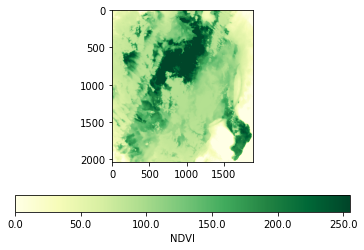

In [15]:
imgplot = plt.imshow(ndvi_contrasted)
imgplot.set_cmap('YlGn')
cbar = plt.colorbar(orientation="horizontal", format='%.1f', shrink=1, pad=0.15, aspect=20)
cbar.set_label(label='NDVI')
#cbar.set_ticks()
cbar.set_ticklabels(['-1', '0', '1'])
plt.clim(0,255)
plt.show()